# Manejo de errores

Los errores pueden producirse debido a actualizaciones, archivos movidos u otros cambios inesperados. Afortunadamente, Python ofrece una amplia compatibilidad para el seguimiento y el control de errores.

Escenario: Creación de un programa de cohetes

Imagina que es un desarrollador que está creando un programa para un cohete. El programa debe leer un archivo de configuración para asegurarse de que se carga la configuración adecuada. La lectura del archivo puede producir un error si falta el archivo o tiene otros problemas. En este módulo, explorarás cómo crear el programa.

¿Qué descubrirás?

Al término de este módulo, sabrás hacer lo siguiente:


Leer y usar la salida de errores de las excepciones Controlar correctamente las excepciones
Generar excepciones con mensajes de error útiles
Usar excepciones para controlar el flujo de un programa

# Uso de tracebacks para buscar errores

Un traceback es el cuerpo del texto que puede apuntar al origen (y al final) de un error no controlado. Comprender los componentes de un traceback hará que seas más eficaz al corregir errores o depurar un programa que no funciona bien.

Si intentamos en un notebook, abrir un archivo inexistente sucede lo siguiente:

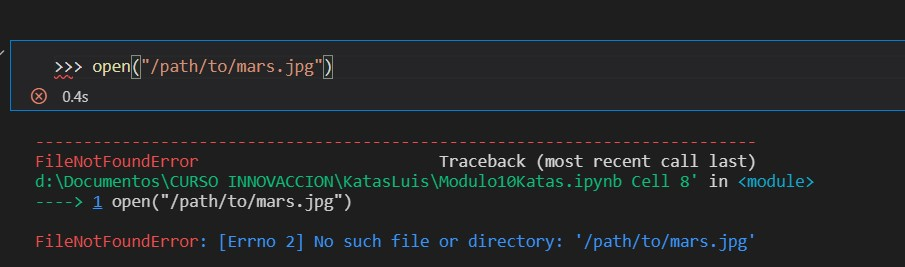

In [142]:
from IPython.display import Image
Image(filename="img\captura7.jpg", width=700, height=250)

Esa salida tiene varias partes clave. En primer lugar, el traceback menciona el orden de la salida. Después, informa de que el archivo es stdin (entrada en el terminal interactivo) en la primera línea de la entrada. El error es FileNotFoundError (el nombre de excepción), lo que significa que el archivo no existe o quizás el directorio correspondiente no existe.

Es mucha información. Puede ser difícil entender por qué la línea 1 es significativa o qué significa Errno 2.

Intenta crear un archivo de Python y asígnale el nombre open.py, con el contenido siguiente:

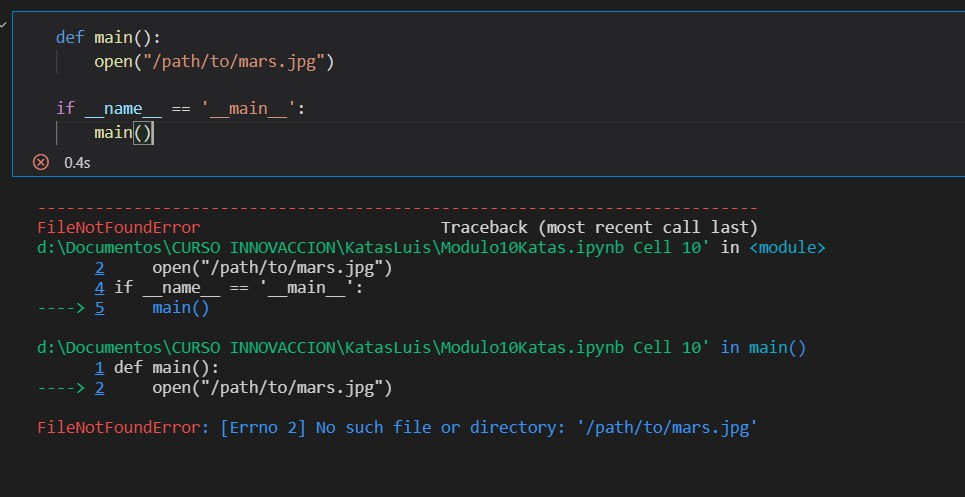

In [143]:
from IPython.display import Image
Image(filename="img\captura8.jpg", width=800, height=400)

La salida de error tiene más sentido ahora. Las rutas de acceso apuntan a un único archivo denominado open.py. La salida menciona que el error se inicia en la línea 5, que incluye la llamada a main(). A continuación, la salida sigue el error a la línea 2 en la llamada de función open(). Y, por último, FileNotFoundError notifica de nuevo que el archivo o el directorio no existen.

Los tracebacks casi siempre incluyen la información siguiente:

Todas las rutas de acceso de archivo implicadas, para cada llamada a cada función.

Los números de línea asociados a cada ruta de acceso de archivo.

Los nombres de las funciones, métodos o clases implicados en la generación de una excepción.

El nombre de la excepción que se ha producido.

# Controlando las excepciones

Cuando encuentres por primera vez excepciones que muestren tracebacks grandes como salida, es posible que te veas tentado/a a detectar todos los errores para evitar que esto suceda.

Si estás en una misión a Marte, ¿Qué podrías hacer si un texto del sistema de navegación dice 'Se ha producido un error'? Imagina que no hay ninguna más información ni contexto, simplemente una luz roja parpadeante con el texto del error. Como desarrollador, resulta útil ponerse al otro lado del programa: ¿Qué puede hacer un usuario cuando se produce un error?   

Aunque en este módulo se explica cómo controlar las excepciones detectándolas, no es necesario detectar las excepciones todo el tiempo. A veces resulta útil permitir que se puedan generar excepciones para que otros autores de llamadas puedan tratar los errores.

# Try y Except de los bloques

Vamos a usar el ejemplo de navegador a fin de crear código que abra archivos de configuración para la misión de Marte. Los archivos de configuración pueden tener todo tipo de problemas, por lo que es fundamental notificarlos con precisión cuando se presenten. Sabemos que, si no existe un archivo o directorio, se genera FileNotFoundError. Si queremos controlar esa excepción, podemos hacerlo con un bloque try y except:

In [144]:
>>> try:
...     open('config.txt')
... except FileNotFoundError:
...     print("No pude encontrar el archivo config.txt!")
...

No pude encontrar el archivo config.txt!


Después de la palabra clave try, agregamos código que tenga la posibilidad de producir una excepción. A continuación, agregamos la palabra clave except junto con la posible excepción, seguida de cualquier código que deba ejecutarse cuando se produce esa condición. Puesto que config.txt no existe en el sistema, Python imprime que el archivo de configuración no está ahí. El bloque try y except, junto con un mensaje útil, evita un seguimiento y sigue informando al usuario sobre el problema.

Aunque es común un archivo que no existe, no es el único error que podemos encontrar. Los permisos de archivo no válidos pueden impedir la lectura de un archivo, incluso si este existe. Vamos a crear un archivo de Python denominado config.py. El archivo tiene código que busca y lee el archivo de configuración del sistema de navegación:

In [145]:
def main():
    try:
        configuration = open('config.txt')
    except FileNotFoundError:
        print("No pude encontrar el archivo config.txt :(!")


if __name__ == '__main__':
    main()

No pude encontrar el archivo config.txt :(!


Una manera poco útil de controlar este error sería detectar todas las excepciones posibles para evitar un traceback. Para comprender por qué detectar todas las excepciones es problemático, probaremos actualizando la función main():

In [146]:
def main():
    try:
        configuration = open('config.txt')
    except Exception:
        print("No pude encontrar el archivo config.txt :(!")

# Generación de excepciones

Ahora que tienes una buena comprensión de los tracebacks y el control de excepciones, vamos a revisar la generación de excepciones.

Es posible que ya conozcas una situación que podría provocar una condición de error al escribir código. En estas situaciones, resulta útil generar excepciones que permitan que otro código comprenda cuál es el problema.

La generación de excepciones también puede ayudar en la toma de decisiones para otro código. Como hemos visto antes, en función del error, el código puede tomar decisiones inteligentes para resolver, solucionar o ignorar un problema.

Los astronautas limitan su uso de agua a unos 11 litros al día. Vamos a crear una función que, con base al número de astronautas, pueda calcular la cantidad de agua quedará después de un día o más:

In [147]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    return f"Total water left after {days_left} days is: {total_water_left} liters"

Probemos con cinco astronautas, 100 litros de agua sobrante y dos días:

In [148]:
>>> water_left(5, 100, 2)
'Total water left after 2 days is: -10 liters'

'Total water left after 2 days is: -10 liters'

Esto no es muy útil, ya que una carencia en los litros sería un error. Después, el sistema de navegación podría alertar a los astronautas que no habrá suficiente agua para todos en dos días. Si eres un ingeniero(a) que programa el sistema de navegación, podrías generar una excepción en la función water_left() para alertar de la condición de error:

In [149]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"

Ahora volvemos a ejecutarlo

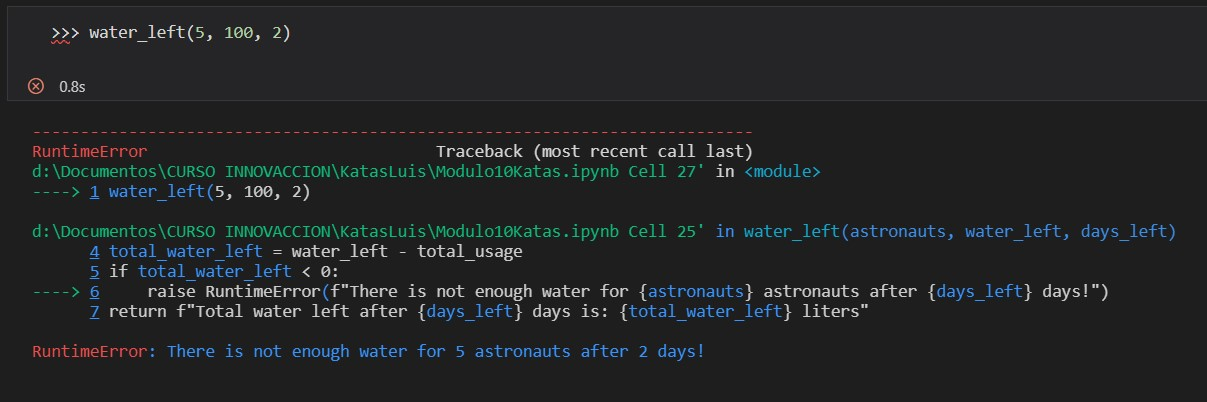

In [150]:
from IPython.display import Image
Image(filename="img\captura9.jpg", width=700, height=250)


La función water_left() también se puede actualizar para evitar el paso de tipos no admitidos. Intentenis pasar argumentos que no sean enteros para comprobar la salida de error:

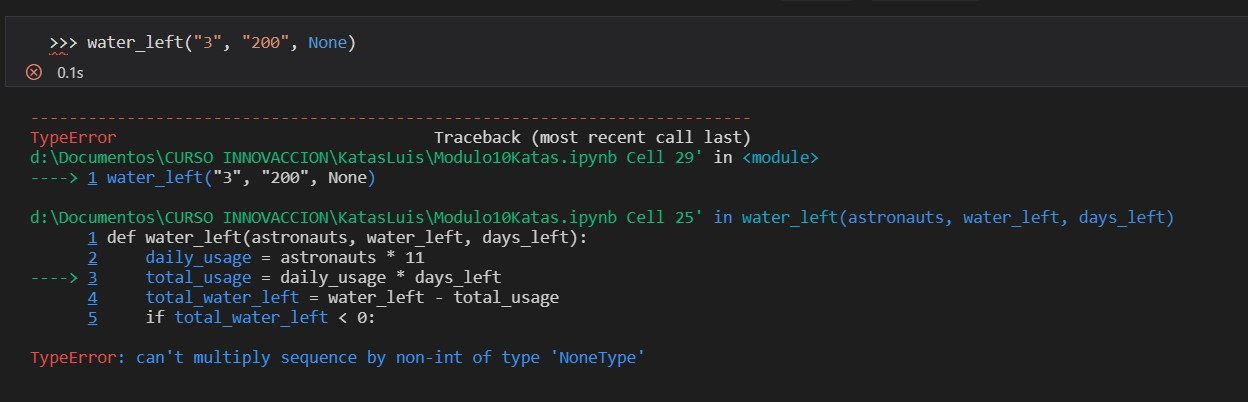

In [151]:
from IPython.display import Image
Image(filename="img\captura11.jpg", width=800, height=400)

El error de TypeError no es muy descriptivo en el contexto de lo que espera la función. Actualizaremos la función para que use TypeError, pero con un mensaje mejor:

In [152]:
#actualizando funcion
def water_left(astronauts, water_left, days_left):
    for argument in [astronauts, water_left, days_left]:
        try:
            # If argument is an int, the following operation will work
            argument / 10
        except TypeError:
            # TypError will be raised only if it isn't the right type 
            # Raise the same exception but with a better error message
            raise TypeError(f"All arguments must be of type int, but received: '{argument}'")
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"

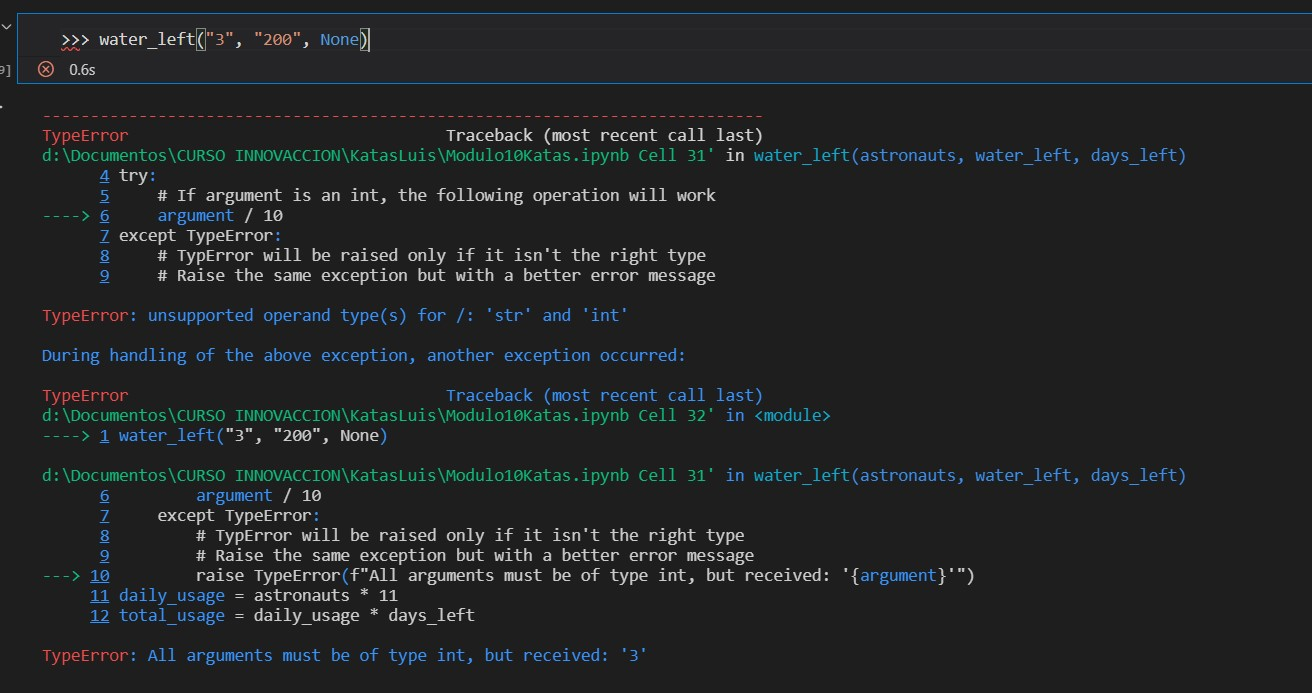

In [153]:
from IPython.display import Image
Image(filename="img\captura10.jpg", width=800, height=400)

# Resumen
Para ser un desarrollador eficaz, debes saber cómo funcionan las excepciones y cómo controlarlas. En este módulo, has descubierto cómo usar la salida de excepción para la depuración, cómo detectar y generar excepciones y, por último, cómo afecta a la lógica de un programa cuando se producen excepciones.

Con los conocimientos del uso y el control de excepciones, puedes evitar problemas comunes, como detectarlos todos para evitar tracebacks.

En este módulo, has obtenido información sobre estas aptitudes:

Leer y usar la salida de error de las excepciones

Controlar correctamente las excepciones

Generar excepciones con mensajes de error útiles

Usar excepciones para controlar el flujo de un programa